### Na capa (1): 
Título: ANÁLISE DE TEMPO E CLIMA EM PYTHON  
Imagem: [post do Faria Lima Elevator: "O que tem mais volatilidade? O clima de SP ou o Índice Ibovespa?"]   
Textinho: sabemos que é meme, mas e aí, como a gente analisa tempo e clima em python? E dados financeiros? Qual será que realmente varia mais, e em qual escala?


### 2

In [594]:
# Importando as bibliotecas necessárias
                                  # dados meterológicos:
from meteostat import Stations
from meteostat import Stations, Daily
from meteostat import Stations, Monthly 
import yfinance as yf             # dados financeiros
from datetime import datetime     # séries de tempo
import matplotlib.pyplot as plt   # visualização de dados
import pandas as pd               # tabelas de dados
import numpy as np                # estatísticas relevantes

Usando a classe Stations da biblioteca metostats, podemos ver quais estações meterológicas estão mais perto da Faria Lima:

In [595]:
# Encontrando estações meterológicas mais próximas
stations = Stations()
stations = stations.nearby(-23.590502, -46.681448) # coordenadas do cruzamento FL x JK
station = stations.fetch(4)

# Print DataFrame
print(station)

######## [usar apenas esse primeiro pedaço da tabela, com os IDs, nomes e região das estações]

                                name country region    wmo  icao  latitude  \
id                                                                           
83780  Sao Paulo/Congonhas Aeroporto      BR     SP  83780  SBSP  -23.6167   
83779                Marte Civ / Mil      BR     SP  83779  SBMT  -23.5167   
83781                      Sao Paulo      BR     SP  83781  <NA>  -23.5000   
86910       Sao Paulo / Chora Menino      BR     SP  86910  <NA>  -23.4964   

       longitude  elevation           timezone hourly_start hourly_end  \
id                                                                       
83780   -46.6500      803.0  America/Sao_Paulo   1931-01-01 2023-08-29   
83779   -46.6333      722.0  America/Sao_Paulo   1973-01-01 2023-08-29   
83781   -46.6167      792.0  America/Sao_Paulo          NaT        NaT   
86910   -46.6200      792.0  America/Sao_Paulo   2016-07-04 2021-08-17   

      daily_start  daily_end monthly_start monthly_end      distance  
id             

Pronto! Vamos usar a estação do Aeroporto Congonhas, de ID 86910

### 3
Vamos analisar, inicialmente, a variação diária em um período de um ano:

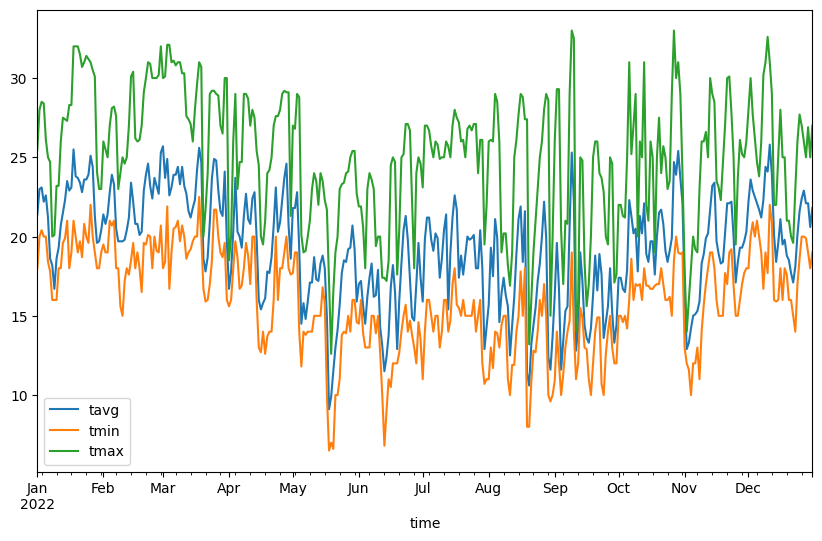

In [596]:
# Definindo um espaço de tempo
start = datetime(2022, 1, 1)
end = datetime(2022, 12, 31)

# Dados diários do clima na estação de Congonhas
clima = Daily('83780', start, end)
clima = clima.fetch()

# Plotando a série de tempo que inclui os valores médios, 
# mínimos e máximos de temperatura em cada dia
clima.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

Esse gráfico já é um grande indicativo de como o tempo de São Paulo varia muito! Mas ainda há mais a analisar

### 4
Podemos ver o quanto a temperatura varia dia a dia usando a função pct_change(), e calcular algumas estatísticas:

In [597]:
clima_retornos = clima['tavg'].pct_change().dropna()

media_clima = np.mean(clima_retornos)
std_clima = np.std(clima_retornos)

print(f"Média do clima: {100*media_clima:.3} %")
print(f"Desvio-padrão do clima: {100*std_clima:.3} %")

Média do clima: 0.688 %
Desvio-padrão do clima: 11.3 %


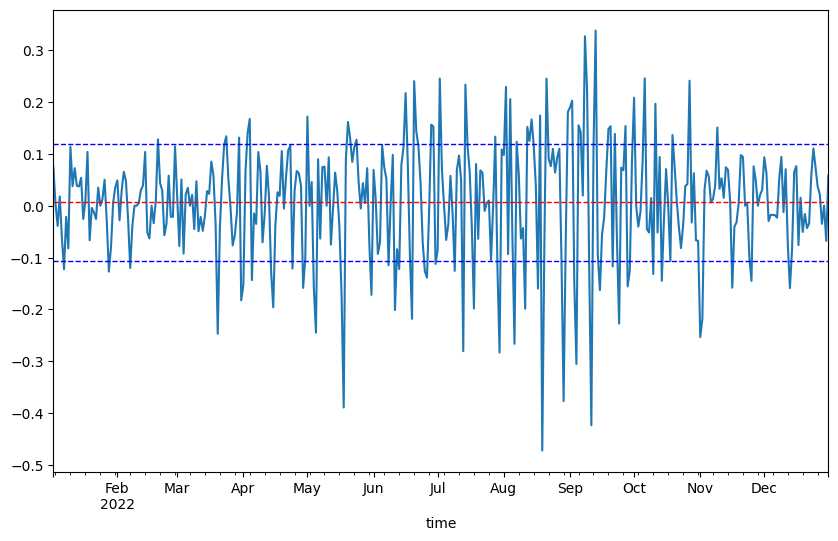

In [598]:
# Gráfico da variação diária do tempo:
clima_retornos.plot()
plt.axhline(y=media_clima, color='r', linestyle='--', linewidth=1)
plt.axhline(y=media_clima+std_clima, color='b', linestyle='--', linewidth=1)
plt.axhline(y=media_clima-std_clima, color='b', linestyle='--', linewidth=1)

Esses dados mais o gráfico, mostram que, em média, a temperatura de um dia para o outro em São Paulo varia em torno de 0%, sendo que em 67% das vezes (1 desvio-padrão para mais e 1 para menos), a temperatura varia até apx. 10% para cima ou para baixo. Ou seja, em um ano, a cada 3 dias, em 1 a temperatura varia mais de 10%!

### 5
Mas e o Ibovespa?

[*********************100%***********************]  1 of 1 completed


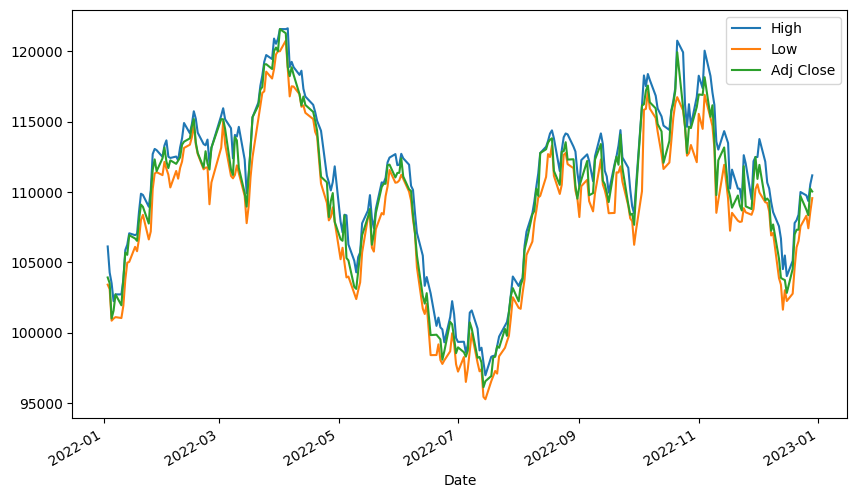

In [599]:
# Usando o yf para coletar os dados do índice Ibovespa
data = yf.download('^BVSP', start=start,end=end)
ibov = pd.DataFrame(data)

# Plotando os valores de máxima, mínima e de fechamendo ajustado por dia no mesmo ano:
data.plot(y=['High', 'Low', 'Adj Close'])
plt.show()

Varia bastante não é mesmo? Mas não parece variar tanto quanto o clima de SP...

### 6

In [600]:
# Variação diária
ibov_retornos = ibov['Adj Close'].pct_change().dropna()
# Média e desvio-padrão:
media_ibov = np.mean(ibov_retornos)
std_ibov = np.std(ibov_retornos)

print(f"Média do Ibovespa: {100*media_ibov:.3} %")
print(f"Desvio-padrão do Ibovespa: {100*std_ibov:.3} %")

Média do Ibovespa: 0.0318 %
Desvio-padrão do Ibovespa: 1.33 %


Repare que, enquanto a média ainda é próxima de 0%, o desvio padrão é praticamente 10x menor que do Clima! Isso fica bem evidente quando comparamos ambos os gráficos de variação:

<AxesSubplot: xlabel='Date'>

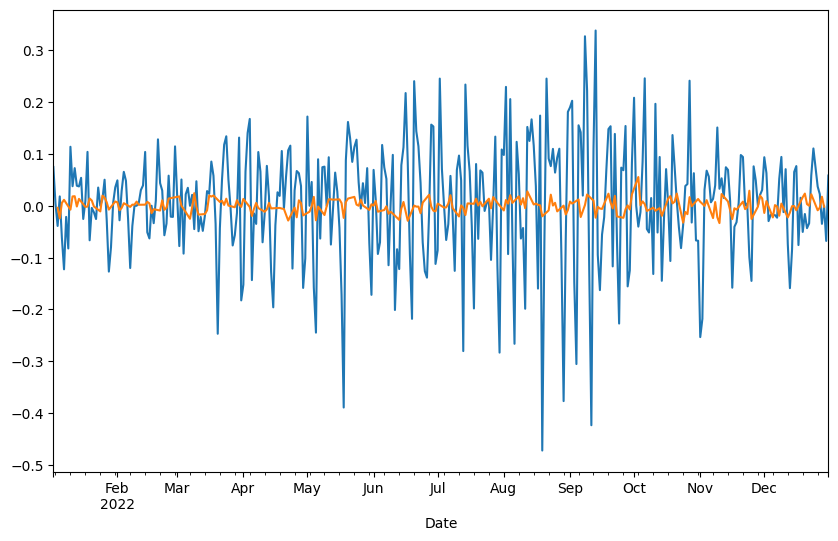

In [601]:
clima_retornos.plot()
ibov_retornos.plot()
### add legenda

### 7
Uma possível melhor forma de visualizar essa diferença, é construindo um histograma com as variações diárias

(array([ 2.,  6., 11.,  9.,  9., 12., 26., 38., 33., 26., 23., 21., 13.,
        13.,  4.,  2.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.03350062, -0.02945929, -0.02541796, -0.02137663, -0.0173353 ,
        -0.01329397, -0.00925264, -0.00521131, -0.00116998,  0.00287135,
         0.00691268,  0.01095401,  0.01499534,  0.01903667,  0.023078  ,
         0.02711933,  0.03116066,  0.03520199,  0.03924332,  0.04328465,
         0.04732598,  0.05136731,  0.05540864]),
 <BarContainer object of 22 artists>)

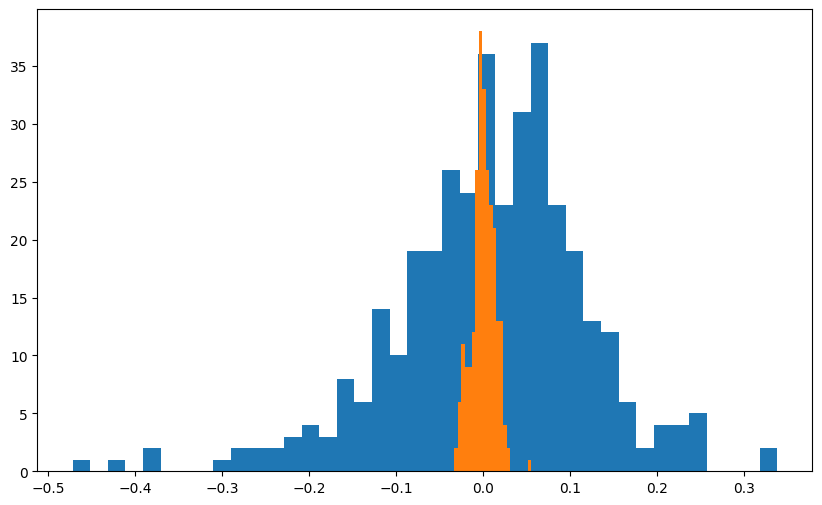

In [602]:
plt.rcParams['figure.figsize'] = (10, 6)

plt.hist(clima_retornos, bins=40)
plt.hist(ibov_retornos, bins=22)

#### Conclusão: dia a dia, o clima de São Paulo varia praticamente 10x mais que o Índice Ibovespa!

### 8
Mas e no longo prazo?

In [603]:
# Novo espaço de tempo
start = datetime(2012, 1, 1)
end = datetime(2022, 12, 31)

# Dados mensais do clima na estação de Congonhas
clima = Monthly('83780', start, end)
clima = clima.fetch()

# Dados mensais do Ibovespa
data = yf.download('^BVSP', start=start,end=end, interval='1mo')
ibov = pd.DataFrame(data)

[*********************100%***********************]  1 of 1 completed


<AxesSubplot: xlabel='Date'>

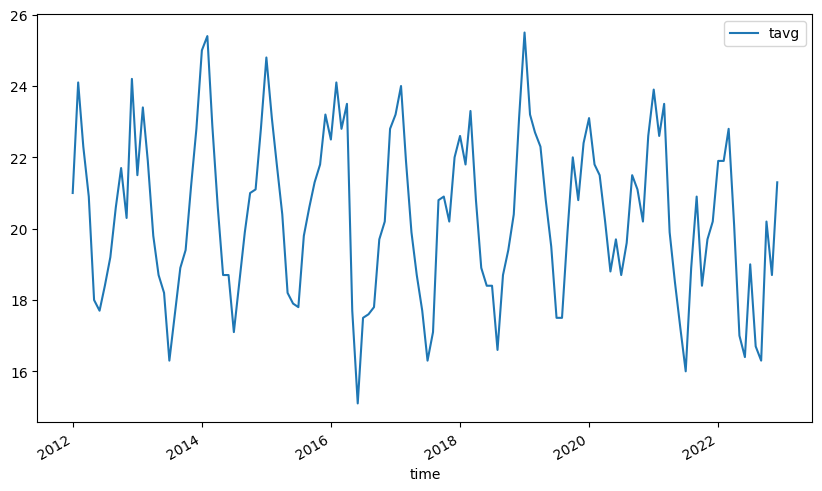

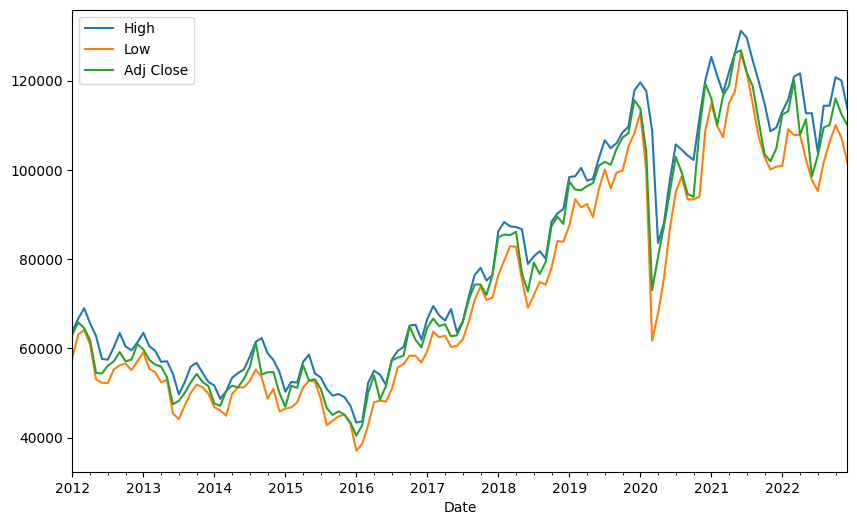

In [604]:
# Plotando a série de tempo que inclui os valores médios da temperatura e preço defechamento ajustado do Ibovespa
clima.plot(y=['tavg'])
ibov.plot(y=['High', 'Low', 'Adj Close'])

### JUNTAR OS PLOTS, DOIS EIXOS Y

### 9
Comparando as variações mensais de cada:

<AxesSubplot: xlabel='Date'>

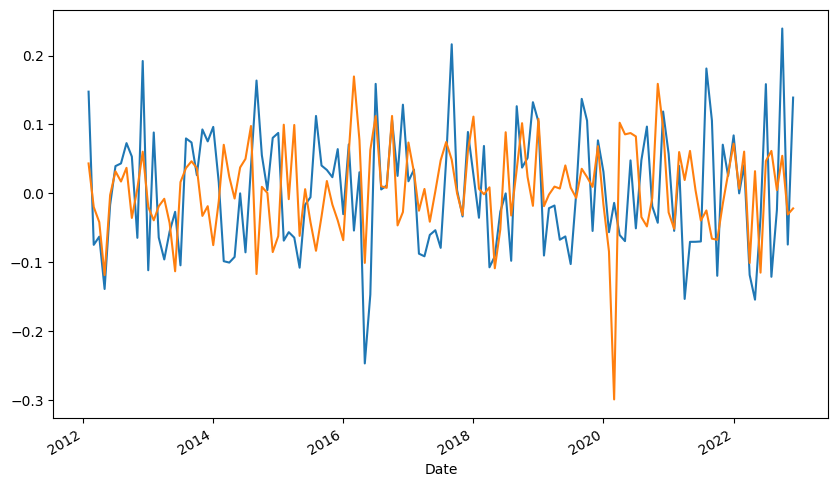

In [605]:
clima_retornos = clima['tavg'].pct_change().dropna()
ibov_retornos = ibov['Adj Close'].pct_change().dropna()
clima_retornos.plot()
ibov_retornos.plot()

In [606]:
print(np.std(ibov_retornos))
print(np.std(clima_retornos))

0.06429559268848628
0.08869172964032611


No longo prazo, eles parecem variar em uma proporção bem mais próxima! Isso pois, no longo prazo, o Ibovespa atua de forma mais incerta e imprevisível, enquanto o clima, ao comparar mês a mês, é um pouco mais previsível pois se aproxima de tendências climáticas mais previsíveis, como as mudanças de temperatura ao longo das 4 estações.    
Vale notar que o mercado financeiro e o clima são fenômenos bem diferentes e essa comparação é uma brincadeira kkkk, mas apesar disso, ambas áreas de estudo (climatologia e finanças) envolvem várias das ferramentas parecidas de análise de dados como as usadas aqui, devido à grande imprevisibilidade das variáveis.


### 10
E aí, quem sofre mais? Um climatólogo ou um analista de ações?
Se gostou, curta, comenta, compartilha.... etc etc